Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import the train and test data
train_data = pd.read_csv("D:\\ds_resources\\black_friday_ds\\train.csv")
test_data = pd.read_csv("D:\\ds_resources\\black_friday_ds\\test.csv")

In [4]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# Combine both the train and test data to perform required transformtion of data.
df = train_data.append(test_data)
df

C:\Users\benoy\anaconda3\lib\site-packages\pandas\core\frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,26-35,B,F,1,15,8,NaN,NaN,P00118942,NaN,4+,1006036
233595,26-35,B,F,1,15,5,8.0,NaN,P00254642,NaN,4+,1006036
233596,26-35,B,F,1,15,1,5.0,12.0,P00031842,NaN,4+,1006036
233597,46-50,C,F,0,1,10,16.0,NaN,P00124742,NaN,4+,1006037


In [7]:
#basic operations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [9]:
#drop user id column since its useless
df.drop(['User_ID'], axis=1, inplace=True)

In [10]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [11]:
# Handling the categorical feature 'Gender'
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [12]:
# Handling the categorical feature Age
df['Age'].unique()
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
df

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+
...,...,...,...,...,...,...,...,...,...,...,...
233594,3,B,0,1,15,8,NaN,NaN,P00118942,NaN,4+
233595,3,B,0,1,15,5,8.0,NaN,P00254642,NaN,4+
233596,3,B,0,1,15,1,5.0,12.0,P00031842,NaN,4+
233597,5,C,0,0,1,10,16.0,NaN,P00124742,NaN,4+


In [14]:
# fixing categorical column City_category
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [15]:
df = pd.concat([df, df_city], axis = 1)

In [16]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [17]:
# now we can drop city_category column as its of no use since column B and C represent city_category.
df.drop(['City_Category'], axis=1, inplace=True)

In [18]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [19]:
# Check for missing values
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

In [20]:
# Purchasing Id is ok to have missing values since that is of the test data. Product category 2 and 3 have to undergo operations
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [22]:
# since it is a discrete value,  good practice would be to replace the missing values with the mode
mode = df['Product_Category_2'].mode()[0]
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode)

In [23]:
# check if the missing values have been replaced
df['Product_Category_2'].isnull().sum()

0

In [24]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [26]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [27]:
# DO the same thing for Product_Category_3
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [28]:
df['Product_Category_3'].isnull().sum()

0

In [29]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4+,0,1


In [30]:
# replace the categorical variable and convert to int
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [32]:
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [33]:
# check if anything else is left
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [34]:
#convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


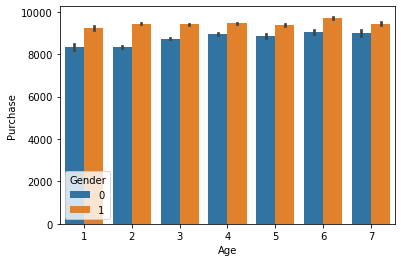

In [35]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

In [36]:
# we can observe from the above plot that purchases done by men are more than women across all age groups

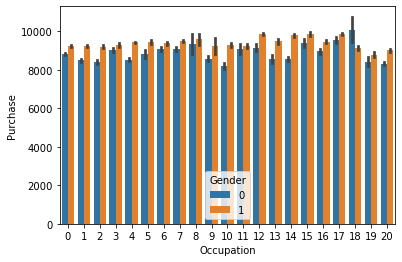

In [37]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

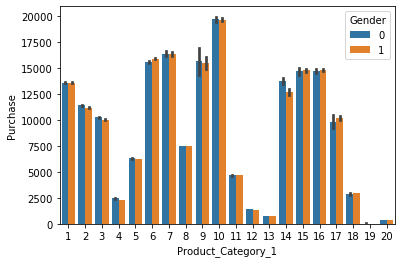

In [38]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

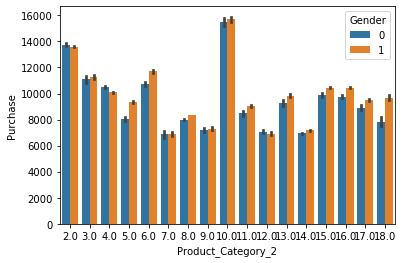

In [39]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)


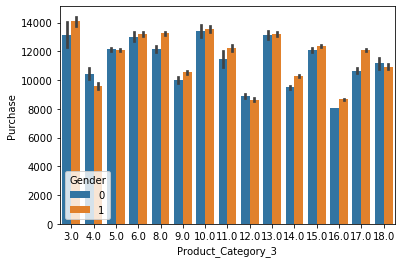

In [40]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [41]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [42]:
# We can drop product ID column
df.drop('Product_ID', axis=1, inplace=True)

In [43]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,7969.0,4,0,1


In [45]:
# Split the data wherever Purchase is null as test data and not null is train data
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [46]:
df_train.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,7969.0,4,0,1


In [47]:
df_test.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,B,C
0,5,1,1,7,1,11.0,16.0,NaN,2,1,0
1,3,1,0,17,3,5.0,16.0,NaN,0,0,1
2,4,0,1,1,5,14.0,16.0,NaN,4,1,0
3,4,0,1,1,4,9.0,16.0,NaN,4,1,0
4,3,0,0,1,4,5.0,12.0,NaN,1,0,1


In [48]:
#Split into x and y
x = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']

In [49]:
x

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,2,0,0
1,1,0,0,10,1,6.0,14.0,2,0,0
2,1,0,0,10,12,8.0,16.0,2,0,0
3,1,0,0,10,12,14.0,16.0,2,0,0
4,7,1,0,16,8,8.0,16.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,6,1,1,13,20,8.0,16.0,1,1,0
550064,3,0,0,1,20,8.0,16.0,3,0,1
550065,3,0,1,15,20,8.0,16.0,4,1,0
550066,7,0,0,1,20,8.0,16.0,2,0,1


In [50]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [52]:
x.shape, y.shape

((550068, 10), (550068,))

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [54]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
# train ur model